In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 16.7 MB 47.7 MB/s 
     |████████████████████████████████| 6.3 MB 36.7 MB/s 


In [2]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=35f42ce96b87b0b2cd210f91e33685bfacee7ece574043530627b93d3f1b1b3f
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [24]:
import altair as alt
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import mapclassify
import folium
import pycountry
import plotly.offline as pyo
import plotly.express as px

alt.renderers.enable('default')

RendererRegistry.enable('default')

In [5]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [6]:
us_state_vaccinations = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv')

In [7]:
locations = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv')

In [8]:
vaccinations = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')

In [9]:
vaccinations_age = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-age-group.csv') 

In [10]:
vaccinations.head(5)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


In [11]:
vaccinations_new=vaccinations.sort_values("date")

In [12]:
vaccinations_new_daily = vaccinations_new.dropna(subset=['daily_vaccinations_per_million'])
fig = px.choropleth(vaccinations_new_daily,                            
                     locations="iso_code",           
                     color="daily_vaccinations_per_million",
                     labels={'daily_vaccinations_per_million': 'Daily vaccinations Per Million'},                    
                     hover_name="location",             
                     animation_frame="date",        
                     projection="natural earth",       
                     color_continuous_scale = 'rainbow'     
                     )  
fig.update_layout(
      title_text = 'Daily vaccinations Per Million in different countries',      
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )      
fig.show()          
fig.write_html("Daily vaccinations Per Million in different countries.html")  # blank spaces are because there is no data entry corresponding to these dates in the dataset.

Output hidden; open in https://colab.research.google.com to view.

In [13]:
vaccinations_new_people = vaccinations_new.dropna(subset=['total_vaccinations_per_hundred'])
vaccinations_new_people = vaccinations_new_people.groupby(['total_vaccinations_per_hundred', 'location'], as_index=False).last()
fig = px.choropleth(vaccinations_new_people,                            
                     locations="iso_code",           
                     color="total_vaccinations_per_hundred",                    
                     labels={'total_vaccinations_per_hundred': 'Total Vaccinations per hundred'},                     
                     hover_name="location",             
                     animation_frame="date",        
                     projection="natural earth",       
                     color_continuous_scale = 'rainbow'     
                     )  
fig.update_layout(
      title_text = 'Total Vaccinations per hundred in different countries',      
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.475, 
         )      
fig.show()          
fig.write_html("Total Vaccinations per hundred in different countries.html")  # blank spaces are because there is no data entry corresponding to these dates in the dataset.

In [14]:
vaccinations_new_people_ = vaccinations_new.dropna(subset=['people_vaccinated'])
fig = px.choropleth(vaccinations_new_people_,                            
                     locations="iso_code",           
                     color="people_vaccinated",
                     labels={'people_vaccinated': 'People vaccinated'},                     
                     hover_name="location",             
                     animation_frame="date",        
                     projection="natural earth",       
                     color_continuous_scale = 'rainbow'     
                     )  
fig.update_layout(
      title_text = 'People vaccinated in different countries',      
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.475, 
         )      
fig.show()          
fig.write_html("People vaccinated in different countries.html")  # blank spaces are because there is no data entry corresponding to these dates in the dataset for the particluar country.

Output hidden; open in https://colab.research.google.com to view.

In [15]:
vaccinations_new = vaccinations_new.dropna(subset=['total_boosters'])
fig = px.choropleth(vaccinations_new,                            
                     locations="iso_code",           
                     color="total_boosters",               
                     hover_name="location",
                     labels={'total_boosters': 'Total Boosters'},             
                     animation_frame="date",        
                     projection="natural earth",       
                     color_continuous_scale = 'rainbow'
                     )  
fig.update_layout(
      title_text = 'Total Boosters in different countries',      
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.475, 
         )      
fig.show()          
fig.write_html("Total Boosters in different countries.html")  # blank spaces are because there is no data entry corresponding to these dates in the dataset.

In [16]:
vaccinations_age_ = vaccinations_age.groupby(['age_group', 'location'], as_index=False).last()

In [17]:
vaccinations_age_=vaccinations_age.sort_values("people_vaccinated_per_hundred")

In [18]:
vaccinations_age_70 = vaccinations_age_.query("age_group > '70'")

In [19]:
vaccinations_age_50 = vaccinations_age_.query("age_group<'70'").query("age_group>'50'")

In [20]:
vaccinations_age_1 = vaccinations_age_.query("age_group<'50'")

In [21]:
fig = px.sunburst(
    vaccinations_age_70,
    path=['age_group','location'],
    values='people_vaccinated_per_hundred',
)
fig.update_layout(title='Vaccinations per hundred of people with Age greater than 70', title_font_size = 22,
      title_font_color="black", 
      title_x=0.475 )
fig.show()
fig.write_html("Vaccinations per hundred of people with Age greater than 70.html")

In [22]:
fig = px.sunburst(
    vaccinations_age_50,
    path=['age_group','location'],
    values='people_vaccinated_per_hundred',
)
fig.update_layout(title='Vaccinations per hundred of people with Age greater than 50 and less than 70', title_font_size = 22,
      title_font_color="black", 
      title_x=0.475 )
fig.show()
fig.write_html("Vaccinations per hundred of people with Age greater than 50 and less than 70.html")

In [25]:
fig = px.sunburst(
    vaccinations_age_1,
    path=['age_group','location'],
    values='people_vaccinated_per_hundred',
)
fig.update_layout(title='Vaccinations per hundred of people with Age less than 50', title_font_size = 22,
      title_font_color="black", 
      title_x=0.475 )
fig.show()
pyo.plot(fig)
fig.write_html("Vaccinations per hundred of people with Age less than 50.html")

In [26]:
vaccinations.rename(columns = {'iso_code':'CODE'}, inplace = True)
vaccinations = vaccinations.dropna()
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

merge=pd.merge(world,vaccinations,on='CODE')
merge=merge.sort_values(by='total_vaccinations',ascending=False).reset_index()

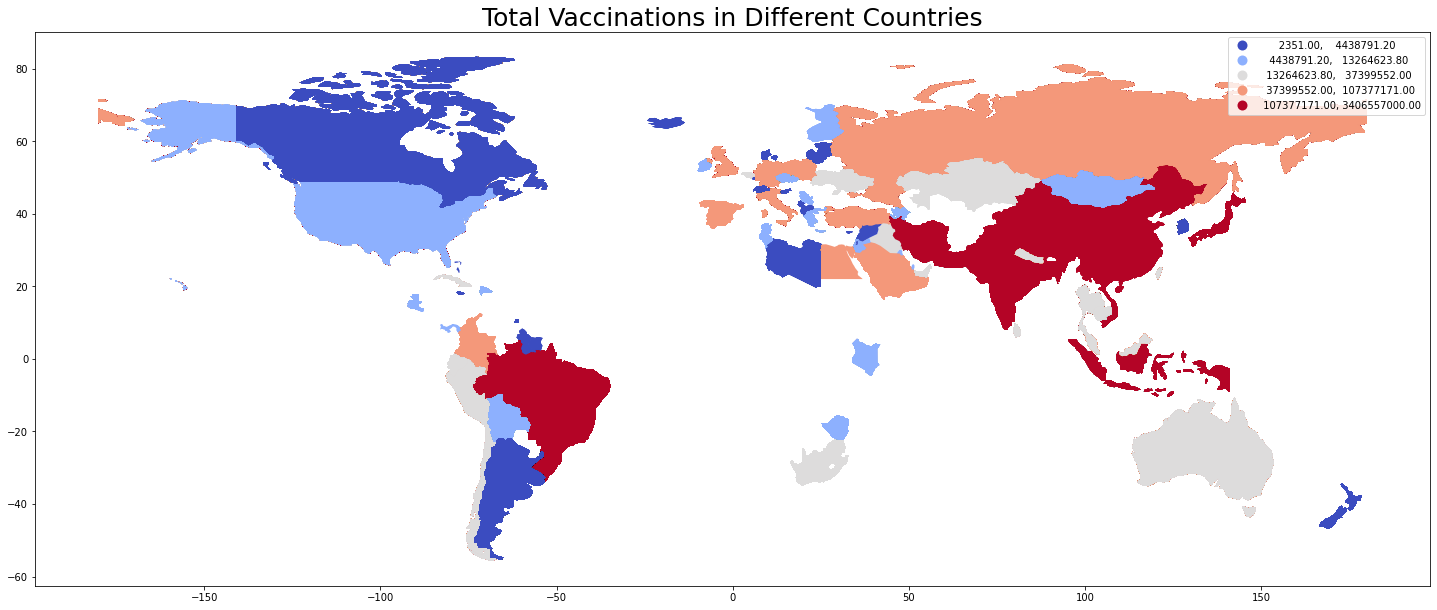

In [27]:
merge.plot(column='total_vaccinations', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('Total Vaccinations in Different Countries',fontsize=25)
plt.show()


In [28]:
%%shell
jupyter nbconvert --to html /content/Project.ipynb

[NbConvertApp] Converting notebook /content/Project.ipynb to html
[NbConvertApp] Writing 8160738 bytes to /content/Project.html
